In [1]:
from scipy.io import loadmat
from pylab import *
from IPython.lib.display import YouTubeVideo

In [2]:
from numpy import where
from numpy.fft import fft, rfft
from scipy.signal import spectrogram
rcParams['figure.figsize']=(12,3)

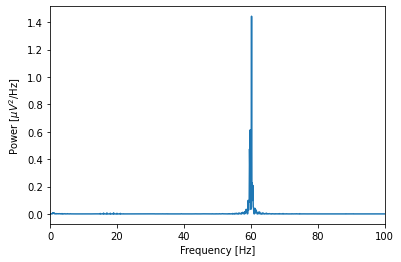

In [3]:
data = loadmat('EEG-1.mat')
EEG = data['EEG'].reshape(-1)         # Extract the EEG variable
t = data['t'][0]                      # ... and the t variable

x = EEG                               # Relabel the data variable
dt = t[1] - t[0]                      # Define the sampling interval
N = x.shape[0]                        # Define the total number of data points
T = N * dt                            # Define the total duration of the data

xf = fft(x - x.mean())                # Compute Fourier transform of x
Sxx = 2 * dt ** 2 / T * (xf * xf.conj())  # Compute spectrum
Sxx = Sxx[:int(len(x) / 2)]           # Ignore negative frequencies

df = 1 / T.max()                      # Determine frequency resolution
fNQ = 1 / dt / 2                      # Determine Nyquist frequency
faxis = arange(0,fNQ,df)              # Construct frequency axis

plot(faxis, Sxx.real)                 # Plot spectrum vs frequency
xlim([0, 100])                        # Select frequency range
xlabel('Frequency [Hz]')              # Label the axes
ylabel('Power [$\mu V^2$/Hz]')
show()

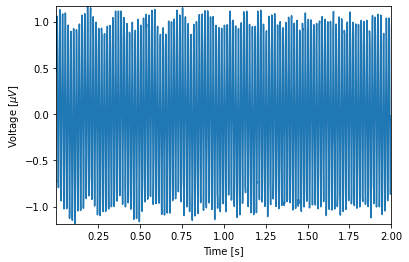

In [5]:
data = loadmat('03_EEG-1.mat')
EEG = data['EEG'][:, 0]                 # Extract the EEG variable
t = data['t'][0]                        # ... and the t variable

plot(t, EEG)                            # Plot the data versus time
xlabel('Time [s]')                      # Label the time axis
ylabel('Voltage [$\mu V$]')             # ... and the voltage axis
autoscale(tight=True)                   # Minimize white space
show()

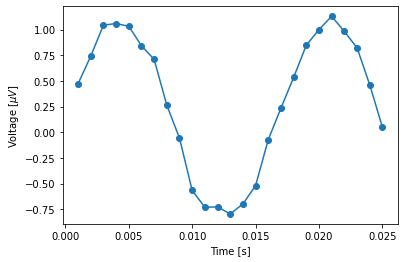

In [6]:
plot(t[:25], EEG[:25], 'o-')    # Plot the first 25 points of data,
xlabel('Time [s]')              # ... with axes labeled.
ylabel('Voltage [$\mu V$]')
show()